In [1]:
#initial import of relevant packages for graphing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [2]:
#read in the data
df = pd.read_csv("5_23_25_tango_round_2_antagonist_as_antagonist_screen_data.csv", index_col=0)  # Set the first column as row index

In [3]:
df

OxA      DMSO       d87       d88       d89       d90  \
Replicate 1  1.212225  0.061898  1.589779  1.123292  0.041265  0.847242   
Replicate 2  1.102066  0.039842  1.206415  1.665194  0.025850  0.678030   
Replicate 3  1.069576  0.022886  0.854831  0.761628  0.043281  0.679809   
Replicate 4  0.616133  0.031779  1.038271  0.767794  0.060712  1.093766   
Average      1.000000  0.039101  1.172324  1.079477  0.042777  0.824712   

                  d91       d92       d93       d94  ...       d96       d97  \
Replicate 1  0.411348  0.590875  0.519017  1.020129  ...  0.101740  0.815225   
Replicate 2  0.209053  0.317315  0.301307  0.314707  ...  0.069843  0.639848   
Replicate 3  0.170990  0.346486  0.374707  0.415498  ...  0.231820  0.495776   
Replicate 4  0.278896  0.337829  0.254587  0.279489  ...  0.320754  0.428305   
Average      0.267572  0.398126  0.362405  0.507456  ...  0.181039  0.594788   

                  d98       d99      d101      d102      d103      d104  \
Replicate 1  0.706964  0.160674  0.842973  0.298343  0.546290  0.676963   
Replicate 2  0.593010  0.308541  0.626567  0.352059  0.550796  0.713367   
Replicate 3  0.524116  0.239884  0.516053  0.431625  0.634394  0.616014   
Replicate 4  0.268935  0.283876  0.519017  0.232769  0.772182  0.267157   
Average      0.523256  0.248244  0.626152  0.328699  0.625915  0.568375   

                 d105      d106  
Replicate 1  0.623484  0.472653  
Replicate 2  0.414787  0.392138  
Replicate 3  0.264785  0.386921  
Replicate 4  0.235378  0.172413  
Average      0.384609  0.356031  

[5 rows x 21 columns]

In [4]:
# Get the divisor: OxA at "average" row
divisor = df.loc["Average", "OxA"]

# Divide the entire DataFrame by that value
df_normalized = df / divisor

#set df_normalized to df
df = df_normalized

In [5]:
#get mean and std dev
column_means = df.mean(axis=0)  # Mean of each column
column_stds = df.std(axis=0)    # Standard deviation of each column

/tmp/ipykernel_3885132/879362608.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


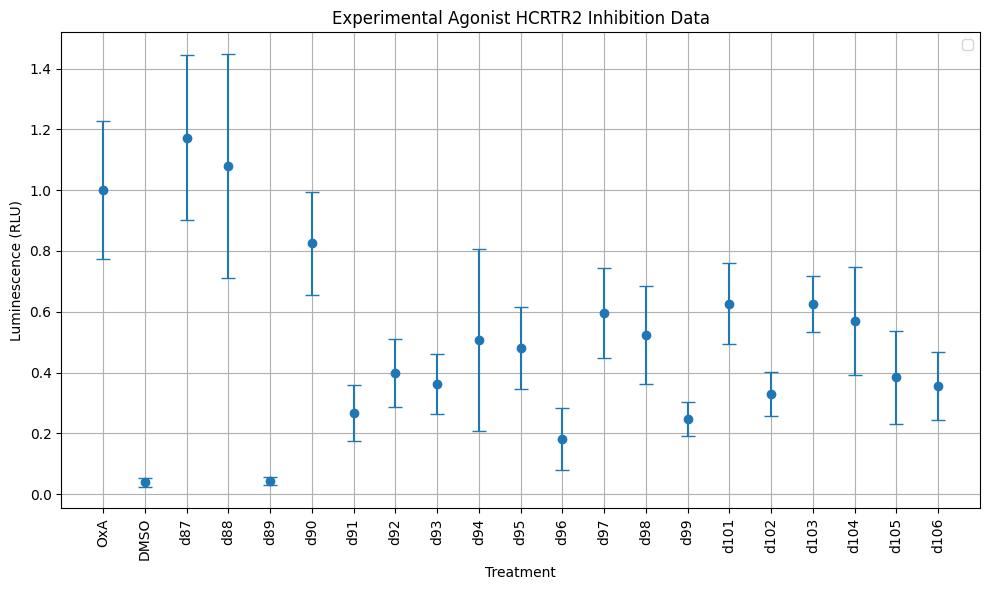

In [6]:
#make plot


plt.figure(figsize=(10, 6))
plt.errorbar(column_means.index, column_means, yerr=column_stds, fmt='o', capsize=5)

# Customizing the plot
plt.title('Experimental Agonist HCRTR2 Inhibition Data')
plt.xlabel('Treatment')
plt.ylabel('Luminescence (RLU)')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
drug_data = df.transpose()
# Drop the row for the drug named "Suvorexant"
#drug_data = drug_data.drop("Suvorexant", axis=0)
drug_data

Replicate 1  Replicate 2  Replicate 3  Replicate 4   Average
OxA      1.212225     1.102066     1.069576     0.616133  1.000000
DMSO     0.061898     0.039842     0.022886     0.031779  0.039101
d87      1.589779     1.206415     0.854831     1.038271  1.172324
d88      1.123292     1.665194     0.761628     0.767794  1.079477
d89      0.041265     0.025850     0.043281     0.060712  0.042777
d90      0.847242     0.678030     0.679809     1.093766  0.824712
d91      0.411348     0.209053     0.170990     0.278896  0.267572
d92      0.590875     0.317315     0.346486     0.337829  0.398126
d93      0.519017     0.301307     0.374707     0.254587  0.362405
d94      1.020129     0.314707     0.415498     0.279489  0.507456
d95      0.505973     0.311386     0.682299     0.421427  0.480272
d96      0.101740     0.069843     0.231820     0.320754  0.181039
d97      0.815225     0.639848     0.495776     0.428305  0.594788
d98      0.706964     0.593010     0.524116     0.268935  0.523256
d99      0.160674     0.308541     0.239884     0.283876  0.248244
d101     0.842973     0.626567     0.516053     0.519017  0.626152
d102     0.298343     0.352059     0.431625     0.232769  0.328699
d103     0.546290     0.550796     0.634394     0.772182  0.625915
d104     0.676963     0.713367     0.616014     0.267157  0.568375
d105     0.623484     0.414787     0.264785     0.235378  0.384609
d106     0.472653     0.392138     0.386921     0.172413  0.356031

/tmp/ipykernel_3885132/1221277324.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [i], drug_means[i], yerr=drug_sems[i], fmt="o", label=drug, capsize=5, markersize=8, color=color
/tmp/ipykernel_3885132/1221277324.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  i, drug_means[i] + drug_sems[i], "*", ha="center", va="bottom", fontsize=14, color="black"


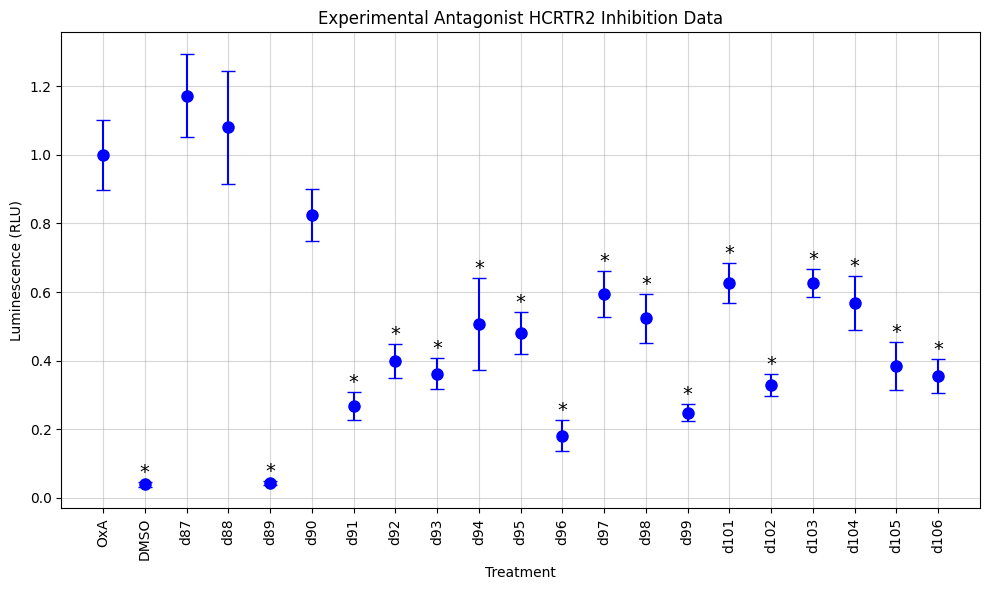

In [9]:
# Extract drug names from the index (row headers)
drug_names = drug_data.index  # Drug names are now the row index
replicates = drug_data  # Replicates are the rest of the data (without the row names)

# Step 2: Calculate mean and standard error for each drug
drug_means = replicates.mean(axis=1)  # Mean across replicates (rows for each drug)
drug_sems = replicates.sem(axis=1)  # Standard error across replicates (rows for each drug)

# Step 3: Perform statistical analysis (t-test against the first drug)
# The first drug is now the first row in the data (first index)
first_drug_values = replicates.iloc[0, :]  # First drug's replicates

# Store p-values for the comparisons
p_values = []

for i, drug in enumerate(drug_names):
    # Compare each drug's data with the first drug using a t-test
    drug_values = replicates.iloc[i, :]  # Data for the current drug
    _, p_value = stats.ttest_ind(first_drug_values, drug_values, equal_var=False)  # Welch's t-test
    p_values.append(p_value)

# Step 4: Plot the data with error bars
plt.figure(figsize=(10, 6))

# Specify a color for all data points (e.g., 'blue')
color = 'blue'

# Plot the drugs with error bars and set all data points to the same color
for i, drug in enumerate(drug_names):
    plt.errorbar(
        [i], drug_means[i], yerr=drug_sems[i], fmt="o", label=drug, capsize=5, markersize=8, color=color
    )

# Add asterisks for statistical significance
for i, p_value in enumerate(p_values):
    if p_value < 0.05:
        plt.text(
            i, drug_means[i] + drug_sems[i], "*", ha="center", va="bottom", fontsize=14, color="black"
        )

# Customize the plot
plt.title('Experimental Antagonist HCRTR2 Inhibition Data')
plt.xlabel('Treatment')
plt.ylabel('Luminescence (RLU)')
plt.xticks(np.arange(len(drug_names)), drug_names, rotation=90, ha="center")
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()